In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
d=pd.read_csv('gold.csv')
d.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
d.max()

Date          9/9/2015
SPX        2872.870117
GLD         184.589996
USO         117.480003
SLV          47.259998
EUR/USD       1.598798
dtype: object

In [7]:
d.min()

Date        1/10/2008
SPX        676.530029
GLD              70.0
USO              7.96
SLV              8.85
EUR/USD      1.039047
dtype: object

In [8]:
d.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
d.count()

Date       2290
SPX        2290
GLD        2290
USO        2290
SLV        2290
EUR/USD    2290
dtype: int64

In [11]:
d.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\3733355292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=d.corr()


<AxesSubplot: >

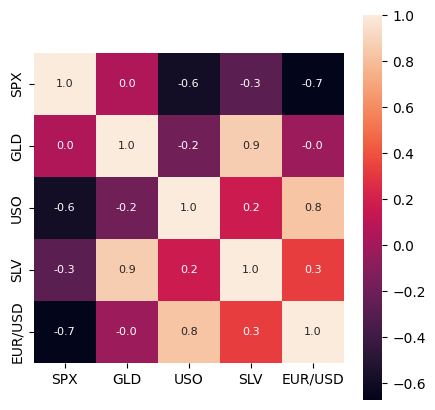

In [14]:
corr=d.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8})

In [15]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_6984\3908672584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['GLD'],color='green')


<AxesSubplot: xlabel='GLD', ylabel='Density'>

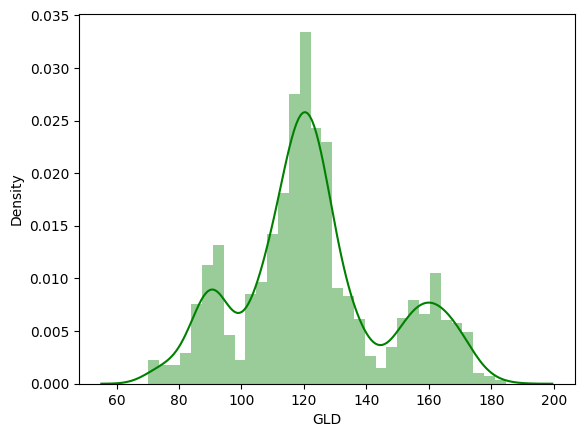

In [17]:
#checking gold price distribution
sns.distplot(d['GLD'],color='green')

In [18]:
d.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
X=d.drop(['Date','GLD'],axis=1)
Y=d['GLD']

In [22]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [23]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
model=RandomForestRegressor()

In [27]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
#prediction of test data
test_data=model.predict(X_test)

In [29]:
print(test_data)

[168.5876996   82.05189981 115.89589991 127.68590058 120.74050129
 154.58809738 150.28109842 126.24180005 117.57629863 126.10459994
 116.76180117 171.74620101 141.22089876 168.02889902 115.1789999
 117.90510044 138.23550232 170.08540178 158.78290276 160.56159934
 154.92000006 125.21980022 176.59899956 156.84290349 125.11370036
  93.86339982  78.05050002 120.53900035 119.06339915 167.50130001
  88.01490052 125.47950011  91.19950073 117.62620003 121.13259884
 135.86810078 115.5129012  115.50870061 147.42659942 107.13940092
 104.08570225  87.21949783 126.63890035 117.69850014 153.40009874
 119.65149979 108.25780004 108.09619828  93.25830038 127.12679766
  74.56370053 113.73729925 121.11759962 111.17749946 118.86549884
 120.55689999 158.57360025 167.96430071 147.11679687  85.71339853
  94.23380018  86.84279899  90.54040038 118.92990089 126.46410052
 127.52369945 169.86869975 122.28049967 117.43529906  98.72400029
 168.174701   143.11639807 131.90550208 121.10450201 120.34839936
 119.698300

In [31]:
#r squared error
error=metrics.r2_score(Y_test,test_data)
print('R squared error is :',error)

R squared error is : 0.9891738358870172


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'actual vs predicted price')

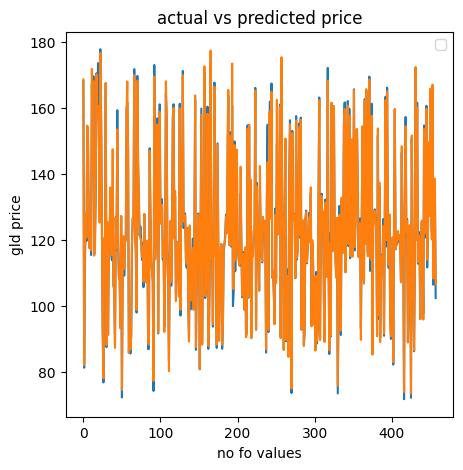

In [38]:
#now we compare the atual or predicted prices
plt.figure(figsize=(5,5))
plt.plot(Y_test)
plt.plot(test_data)
plt.xlabel('no fo values')
plt.ylabel('gld price')
plt.legend()
plt.title('actual vs predicted price')


In [34]:
Y_test=list(Y_test)

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()